In [7]:
import torch
from model import init_model
from get_dataloader import get_dataloaders


In [10]:
train,val, test_loader, _ = get_dataloaders(data_path="./data/content/structured_dataset/",model_name="proxyless_nas")

Class anger -> index 0
  Found 527 images for class anger
Class contempt -> index 1
  Found 537 images for class contempt
Class disgust -> index 2
  Found 528 images for class disgust
Class embarrass -> index 3
  Found 503 images for class embarrass
Class fear -> index 4
  Found 527 images for class fear
Class joy -> index 5
  Found 526 images for class joy
Class neutral -> index 6
  Found 527 images for class neutral
Class pride -> index 7
  Found 483 images for class pride
Class sadness -> index 8
  Found 529 images for class sadness
Class surprise -> index 9
  Found 501 images for class surprise
Total images: 5188
Number of classes: 10
Label range: min=0, max=9


RuntimeError: Unknown model (proxyless_nas)

In [5]:

init_model(num_heads=10,model_name="proxyless_nas",freeze_backbone=False)

Using cache found in /home/wicaksonolxn/.cache/torch/hub/mit-han-lab_ProxylessNAS_master


ProxylessNASNets(
  (first_conv): ConvLayer(
    (bn): BatchNorm2d(40, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU6(inplace=True)
    (conv): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (blocks): ModuleList(
    (0): MobileInvertedResidualBlock(
      (mobile_inverted_conv): MBInvertedConvLayer(
        (depth_conv): Sequential(
          (conv): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
          (bn): BatchNorm2d(40, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU6(inplace=True)
        )
        (point_linear): Sequential(
          (conv): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
    (1): MobileInvertedResidualBlock(
      (mobile_inverted_conv): MBInvertedConvLayer(
        (in

In [3]:
model = torch.hub.load(
        'mit-han-lab/ProxylessNAS',
        'proxyless_gpu',
        pretrained=True
    )

/home/wicaksonolxn/miniconda3/envs/torch_env/lib/python3.10/site-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/mit-han-lab/ProxylessNAS/zipball/master" to /home/wicaksonolxn/.cache/torch/hub/master.zip
Downloading: "https://raw.githubusercontent.com/han-cai/files/master/proxylessnas/proxyless_gpu.config" to /home/wicaksonolxn/.torch/proxyless_nas/proxyless_gpu.config
Downloading: "https://raw.gi

In [1]:
from get_dataloader import get_dataloaders
from model import init_model
import timm

In [2]:
model = timm.create_model("tf_efficientnet_lite1.in1k", pretrained=True)
model.to("cuda")
data_cfg = timm.data.resolve_model_data_config(model)
train_tf = timm.data.create_transform(**data_cfg, is_training=True)
val_tf = timm.data.create_transform(**data_cfg, is_training=False)
del model
train_tf, val_tf

model.safetensors:   0%|          | 0.00/21.9M [00:00<?, ?B/s]

(Compose(
     RandomResizedCropAndInterpolation(size=(240, 240), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bicubic)
     RandomHorizontalFlip(p=0.5)
     ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=None)
     MaybeToTensor()
     Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
 ),
 Compose(
     Resize(size=272, interpolation=bicubic, max_size=None, antialias=True)
     CenterCrop(size=(240, 240))
     MaybeToTensor()
     Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
 ))

In [3]:
train_tf


Compose(
    RandomResizedCropAndInterpolation(size=(240, 240), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bicubic)
    RandomHorizontalFlip(p=0.5)
    ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=None)
    MaybeToTensor()
    Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
)

In [13]:

train,val, test_loader, _ = get_dataloaders(data_path="./data/aggregated/")

Loaded 3169/793/991 samples across 10 classes.


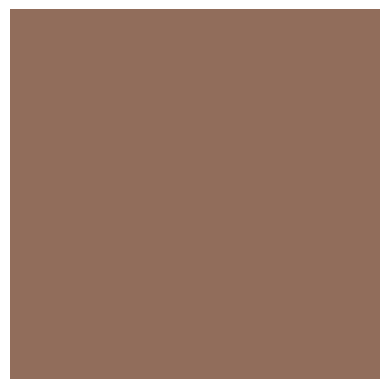

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def denormalize(tensor, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
    tensor = tensor.clone().detach().cpu()  
    tensor = tensor.permute(1, 2, 0)      
    tensor = tensor.numpy()                 
    
    # Denormalize
    tensor = tensor * std + mean
    tensor = np.clip(tensor, 0, 1)          
    return tensor
def imshow(img, title=None):
    """Display image for a Tensor."""
    img = denormalize(img)
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.axis('off')
images, labels = next(iter(train))

imshow(images[0])
plt.show()